Movies similar to 'Toy Story (1995)':
60800                                     UglyDolls (2019)
3021                                    Toy Story 2 (1999)
17431    Asterix and the Vikings (AstÃ©rix et les Vikin...
30472           Scooby-Doo! Mask of the Blue Falcon (2012)
52833                                Trolls Holiday (2017)
Name: title, dtype: object


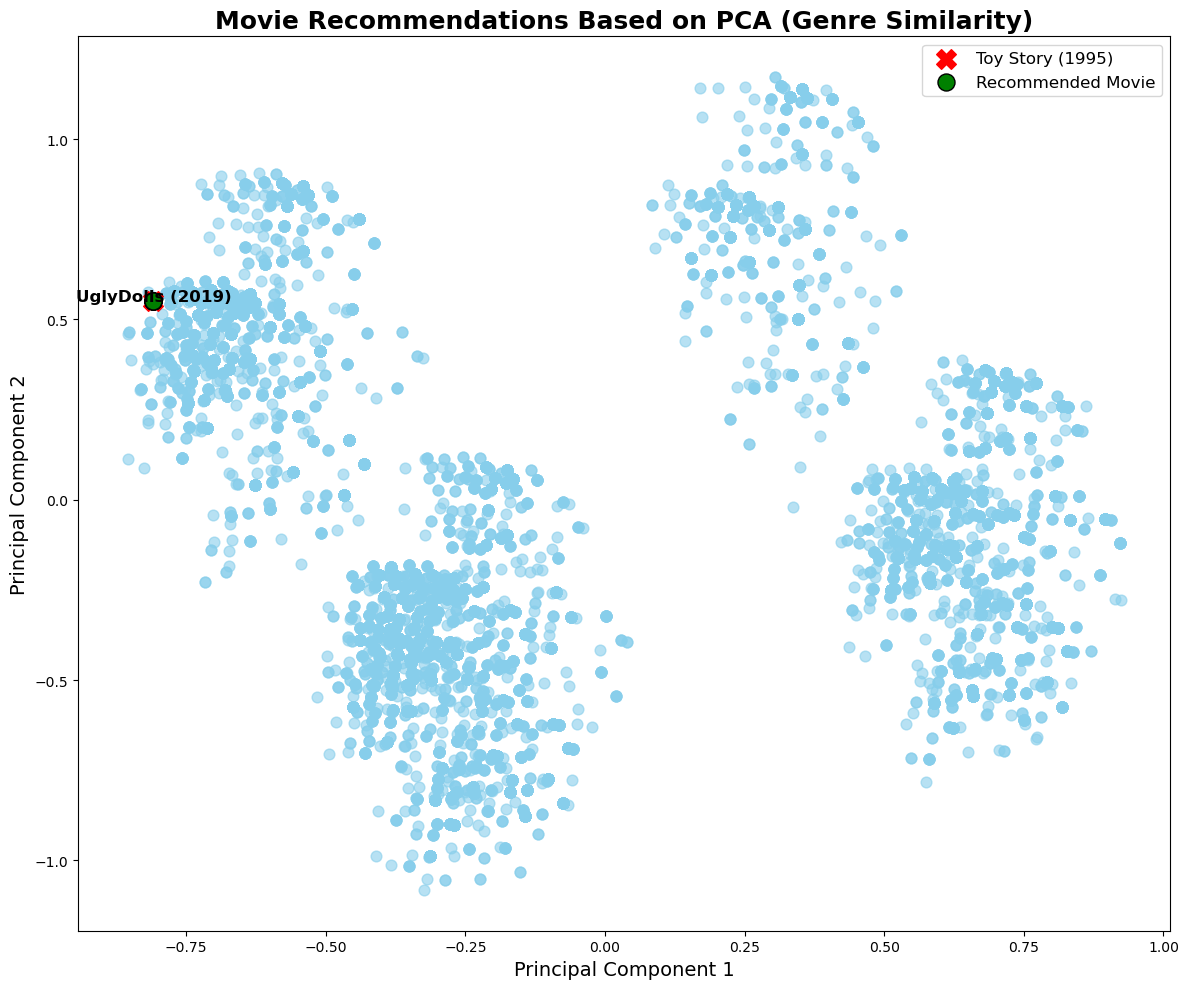


Recommended Movies based on PCA:
1. UglyDolls (2019)
2. Toy Story 2 (1999)
3. Asterix and the Vikings (AstÃ©rix et les Vikings) (2006)
4. Scooby-Doo! Mask of the Blue Falcon (2012)
5. Trolls Holiday (2017)


In [1]:
# Project : With Movie Recommendation System, Create a collaborative filtering system to recommend movies.

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the movies dataset
movies = pd.read_csv('C:/Users/User/Desktop/Python/Ivoyant Projects/Movie Recommendation System/movies.csv', encoding='ISO-8859-1')

# One-hot encoding the genres
genres = movies['genres'].str.get_dummies('|')  # Assuming genres are separated by '|'

# Apply PCA for dimensionality reduction (reduce to 2 components for visualization)
pca = PCA(n_components=2)
movie_features_pca = pca.fit_transform(genres)  # Use the one-hot encoded genres data for PCA

# A function to recommend similar movies based on PCA reduced features
def recommend_movies(movie_title, movies_df, pca_data, n_recommendations=5):
    # Find the index of the movie
    movie_idx = movies_df[movies_df['title'] == movie_title].index[0]

    # Get the PCA representation of the movie
    movie_pca = pca_data[movie_idx]

    # Calculate the Euclidean distances to all other movies in the PCA space
    distances = np.linalg.norm(pca_data - movie_pca, axis=1)

    # Sort the distances and get the indices of the most similar movies
    similar_movie_indices = distances.argsort()[1:n_recommendations + 1]  # Exclude the movie itself

    # Return the movie titles of the similar movies and their indices
    recommended_movies = movies_df['title'].iloc[similar_movie_indices]
    return recommended_movies, similar_movie_indices

# Example: Recommend movies similar to 'Toy Story (1995)'
example_movie = 'Toy Story (1995)'

if example_movie in movies['title'].values:
    recommendations, similar_indices = recommend_movies(example_movie, movies, movie_features_pca)
    print(f"Movies similar to '{example_movie}':")
    print(recommendations)
else:
    print(f"Movie '{example_movie}' not found.")

# Enhanced Graph: PCA Visualization
plt.figure(figsize=(12, 10))

# Plot all movies with a light background color
plt.scatter(movie_features_pca[:, 0], movie_features_pca[:, 1], c='skyblue', s=60, alpha=0.6)

# Highlight the selected movie with a distinct color
movie_idx = movies[movies['title'] == example_movie].index[0]
plt.scatter(movie_features_pca[movie_idx, 0], movie_features_pca[movie_idx, 1], c='red', s=200, marker='X', label=example_movie)

# Highlight the recommended movies with green color
for idx in similar_indices:
    plt.scatter(movie_features_pca[idx, 0], movie_features_pca[idx, 1], c='green', s=150, marker='o', edgecolors='black', label="Recommended Movie" if idx == similar_indices[0] else "")
    
    # Reduce clutter by only labeling the selected movie and the first recommended movie
    if idx == similar_indices[0]:
        plt.text(movie_features_pca[idx, 0], movie_features_pca[idx, 1], movies['title'].iloc[idx], fontsize=12, ha='center', color='black', fontweight='bold', alpha=1.0)

# Add title and labels with larger font sizes for visibility
plt.title('Movie Recommendations Based on PCA (Genre Similarity)', fontsize=18, weight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

# Output the recommended movies list
print("\nRecommended Movies based on PCA:")
for i, movie in enumerate(recommendations, 1):
    print(f"{i}. {movie}")
